<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_beginner.png?raw=true' align='right' width=50>
***
# *Practicum AI:* Deep Learning - Keras Binary Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.05, page 79).

#### 1. Import libraries
Import the necessary libraries.  Note the import of pandas to support basic data wrangling tasks and matplotlib to visualize the data.  Sequential is imported from Keras as it allows us to quickly add layers to a custom neural network.  And because we want the model to consist of a single fully-connected layer, we import Dense as well.

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2. Create a dataframe with data from the dataset

```python 
df = pd.read_csv('data/02.2_data.csv')
```
### <img src='images/tip_icon.svg' alt="Tip icon" width=40 align=center> Tip
>If running on Google Colab, change the code to: <br>
    <code>df = pd.read_csv('https://raw.githubusercontent.com/PracticumAI/deep_learning/main/data/02.2_data.csv') </code>

In [12]:
# Code it!
df = pd.read_csv('data/02.2_data.csv')

#### 3. Examine the first 5 rows
Use the `head()` method to examine the first 5 rows.

```python
df.head()
```

In [13]:
# Code it!
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


#### 4. Visualize the data
After plotting the data, we see two distinct classes.  
- Data points labelled 0 are shown as stars
- Data points labelled 1 are shown as triangles 

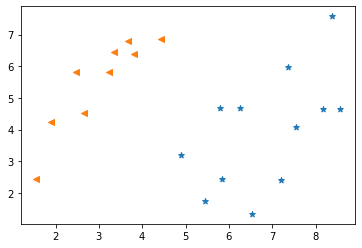

In [14]:
plt.scatter(df[df['label'] == 0]['x1'], \
            df[df['label'] == 0]['x2'], \
            marker = '*')

plt.scatter(df[df['label'] == 1]['x1'], \
            df[df['label'] == 1]['x2'], \
            marker = '<')

#### 5. Define variables for the features and labels
Prepare the data for the model, with X_input containing the features and y_label the corresponding labels for each feature.

```python
x_input = df[['x1','x2']].values
y_label = df[['label']].values
```

In [15]:
# Code it
x_input = df[[ 'x1', 'x2']].values
y_label = df[[ 'label']].values

#### 6. Create a simple (sequential) neural network with a single layer with one node
Instantiate a Sequential model and then add a Dense layer to it.  The parameters in `model.add(Dense())` are as follows:

- *units* : number of neurons in the layer
- *input_dim* : the number of incoming features (2 in this case)
- *activation* : the type of activation function

```python
model = Sequential()
model.add(Dense(units = 1, input_dim = 2, activation = 'sigmoid'))
```

In [16]:
# Code it!
model = Sequential()
model.add(Dense(units =1, input_dim = 2, activation = 'sigmoid'))

#### 7. Compile the model
Compile the model with the Adam optimizer, the binary_crossentropy loss function, and accuracy metrics.

Adam stands for Adaptive Momentum and is a popular optimizer choice.  The binary crossentropy loss function is an appropriate choice, given that this is a binary classifier.  And finally, the *accuracy* metrics parameter turns on display of information such as the number of epochs, the training loss, the training accuracy, the test loss, and the test accuracy during the training process.   

```python
model.compile(optimizer = 'adam', \
              loss = 'binary_crossentropy',\
              metrics = ['accuracy'])
```

In [17]:
# Code it!
model.compile(optimizer = 'adam',\
              loss = 'binary_crossentropy', \
              metrics = ['accuracy'])

#### 8. Examine the model with the summary() method
Do a final check of the model's configuration before training.

```python
model.summary()
```

In [18]:
# Code it!
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### 9. Train the model with the fit() method
Train the model for 1000 epochs.

```python
model.fit(x_input, y_label, epochs = 1000)
```

In [22]:
# Code it!
model.fit(x_input, y_label, validation_split=0.2, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.1579 - accuracy: 1.0000 - val_loss: 0.1723 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1578 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1576 - accuracy: 1.0000 - val_loss: 0.1729 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1574 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1571 - accuracy: 1.0000 - val_loss: 0.1740 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1568 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1565 - accuracy: 1.0000 - val_loss: 0.1755 - val_accuracy: 1.0000
Epoch 8/1000


#### 10. Evaluate the model with the evaluate() method

```python
model.evaluate(x_input, y_label)
```

In [23]:
# Code it!
model.evaluate(x_input, y_label)

1/1 [==============================] - 0s 13ms/step - loss: 0.1278 - accuracy: 1.0000


[0.12783277034759521, 1.0]